In [1]:
library(ggplot2)

# Binary Logistic Regression

In [2]:
# Loading data
log_reg_bin <- read.csv("../../datasets/log_reg_bin.csv")
head(log_reg_bin)

oxygen,survive
10,0
5,0
75,1
14,0
8,0
50,1


In [3]:
# Making output variable as factors <categorial>
log_reg_bin$survive <- as.factor(log_reg_bin$survive)

In [4]:
# Making train and test data
set.seed(42)
ind <- sample(x = nrow(log_reg_bin), size = floor(0.75 * nrow(log_reg_bin)))

log_bin_train <- log_reg_bin[ind,]
log_bin_test <- log_reg_bin[-ind,]

In [5]:
# Building logistic regression model
log_bin_model <- glm(formula = survive~oxygen,
                     data = log_bin_train,
                     family = binomial(link = "logit"))
log_bin_model
# From the model we can state that for a unit change in "oxygen", log odds change by 230.3%

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:  glm(formula = survive ~ oxygen, family = binomial(link = "logit"), 
    data = log_bin_train)

Coefficients:
(Intercept)       oxygen  
    -92.173        2.303  

Degrees of Freedom: 10 Total (i.e. Null);  9 Residual
Null Deviance:	    15.16 
Residual Deviance: 3.97e-10 	AIC: 4

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

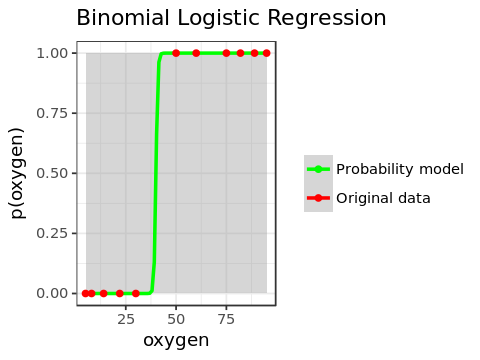

In [6]:
# Visualizing the model
xval = log_bin_train$oxygen
yval = predict(log_bin_model,data.frame(oxygen = log_bin_train$oxygen),type = "response")
options(repr.plot.width=4, repr.plot.height=3)
ggplot() +
  stat_smooth(method = "glm", method.args = list(family = "binomial"), 
              aes(xval, yval, col ="Probability model")) +
          geom_point(aes(log_bin_train$oxygen, 
                         ifelse(as.numeric(log_bin_train$survive) == 2, 1,0), 
                         col = "Original data")) +
          scale_colour_manual("", 
                              breaks = c("Probability model", "Original data"), 
                              values = c("red", "green")) +  
          ylab("p(oxygen)") + xlab("oxygen") + ggtitle("Binomial Logistic Regression") +
          theme_bw()

In [7]:
## Predicting if a person survive based on our built model and test data

# Determining prob. for each oxygen value
log_pred <- data.frame(predict(log_bin_model, data.frame(oxygen = log_bin_test$oxygen), type = "response"))
colnames(log_pred) <- "pred_prob"

# Assigning threshold probability - based on domain knowledge
thr_prob <- 0.5

# Categorizing survival based on predicted probabilities
log_pred$pred_surv <- ifelse(log_pred$pred_prob <=0.5, 0, 1)
log_pred

pred_prob,pred_surv
2.220446e-16,0
9.532594e-03,0
9.999990e-01,1
1.000000e+00,1


In [8]:
# Comparing actual and predicted values
cmp_df <- data.frame(log_bin_test$oxygen, log_bin_test$survive, log_pred$pred_surv)
names(cmp_df) <- c("Oxygen", "Actual Survival", "Predicted Survival")
cmp_df
actual <- cmp_df$`Actual Survival`
predicted <- cmp_df$`Predicted Survival`

Oxygen,Actual Survival,Predicted Survival
10,0,0
38,0,0
46,0,1
66,1,1


In [9]:
# Finding accuracy of the model
log_acc <- addmargins(table(actual, predicted)); log_acc
# Adding starting 2 Values of parent diagonal {2 + 1}, dividing by total value {4} 
((log_acc[1] + log_acc[5])/log_acc[9]) * 100

,0,1,Sum
0,2,1,3
1,0,1,1
Sum,2,2,4


[1] 75

# Multinomial Logistic Regression

In [10]:
log_reg_mul <- read.csv("../../datasets/log_reg_mul.csv")
head(log_reg_mul)
levels(log_reg_mul$cars)

budget,cars
100000,Toyota
250000,Toyota
500000,Toyota
750000,Toyota
1000000,Toyota
2000000,Ferrari


[1] "Bugatti" "Ferrari" "Toyota"

In [11]:
# setting reference category -> "Ferrari"
log_reg_mul$ref <- relevel(log_reg_mul$cars, ref = "Ferrari")
head(log_reg_mul)

budget,cars,ref
100000,Toyota,Toyota
250000,Toyota,Toyota
500000,Toyota,Toyota
750000,Toyota,Toyota
1000000,Toyota,Toyota
2000000,Ferrari,Ferrari


In [12]:
# Making train and test data
set.seed(41)
ind <- sample(x = nrow(log_reg_mul), size = floor(0.70 * nrow(log_reg_mul)))

log_mul_train <- log_reg_mul[ind,-2]      # excluding "cars" column
log_mul_test <- log_reg_mul[-ind,-2]      # excluding "cars" column

In [13]:
# building logistic multinomial model
library(nnet)
log_mul_model <- multinom(ref~., data = log_mul_train)
log_mul_model

# weights:  9 (4 variable)
initial  value 10.986123 
iter  10 value 0.473473
iter  20 value 0.042648
iter  30 value 0.018414
iter  40 value 0.010653
iter  50 value 0.008845
iter  60 value 0.008080
iter  70 value 0.007073
iter  70 value 0.007073
final  value 0.007073 
converged


Call:
multinom(formula = ref ~ ., data = log_mul_train)

Coefficients:
        (Intercept)        budget
Bugatti   -25.66995  3.595444e-06
Toyota     20.08826 -1.361525e-05

Residual Deviance: 0.01414667 
AIC: 8.014147 

In [14]:
# predicting probabilities using model and test data
log_mul_pred <- predict(log_mul_model, log_mul_test, type = "prob"); log_mul_pred

,Ferrari,Bugatti,Toyota
1,7.363455e-09,7.497389e-20,1.000000e+00
3,1.707230e-06,7.323405e-17,9.999983e-01
7,9.999998e-01,1.168638e-07,5.741764e-08
12,4.568020e-07,9.999995e-01,1.438915e-64
15,8.292626e-21,1.000000e+00,2.411861e-130


In [15]:
# verifying if all 3 probabilities in a row sum to 1
apply(log_mul_pred, 1, sum)

1  3  7 12 15 
 1  1  1  1  1

In [16]:
# classifying categories based on the probability
log_mul_class <- predict(log_mul_model, log_mul_test, type = "class"); log_mul_class

[1] Toyota  Toyota  Ferrari Bugatti Bugatti
Levels: Ferrari Bugatti Toyota

In [17]:
# Comparing predicted output with actual value
cmp_df <- data.frame(log_mul_test$ref, log_mul_class)
colnames(cmp_df) <- c("Actual","Predicted"); cmp_df

Actual,Predicted
Toyota,Toyota
Toyota,Toyota
Ferrari,Ferrari
Bugatti,Bugatti
Bugatti,Bugatti


In [18]:
# Finding accuracy of the model
log_mul_acc <- addmargins(table(cmp_df)); log_mul_acc

((log_mul_acc[1] + log_mul_acc[6] + log_mul_acc[11])/log_mul_acc[16]) * 100
# 100% accuracy

,Ferrari,Bugatti,Toyota,Sum
Ferrari,1,0,0,1
Bugatti,0,2,0,2
Toyota,0,0,2,2
Sum,1,2,2,5


[1] 100